In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('Plant_Tree_data.xlsx', sheet_name='Sheet1')

In [3]:
df.describe(include = 'all')

,LeafLength,LeafBreadth,ErrorLeafLength,ErrorLeafBreadth,LeafCurveAngle,EdgeCurvatureAngle,ErrorLeafCurvature,TreeLength,TreeType
count,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000
mean,111.079968,46.549532,0.477857,1.770279,12.614400,26.326515,8.303556,104.857709,0.091574
std,25.652935,6.843189,1.064040,6.167913,29.472897,19.470572,4.506092,106.514540,0.288432
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.929688,42.376018,0.027098,-0.188572,1.923077,14.437332,5.781506,34.960504,0.000000
50%,115.078125,46.947479,0.223240,0.198710,2.801839,18.461316,8.433515,83.064556,0.000000
75%,127.085938,51.023202,0.473325,0.927783,5.464256,28.428104,10.702959,139.309330,0.000000
max,192.617188,98.778911,8.069522,68.101622,223.392141,110.642211,34.539844,1191.000837,1.000000


As error value is given for Leaf length, leaf bredth and leaf curvature, let us calculate the actual values of these columns 

In [23]:
df['ActualLeafLength'] = df['LeafLength'] + df['ErrorLeafLength']
df['ActualLeafBreadth'] = df['LeafBreadth'] + df['ErrorLeafBreadth']
df['ActualLeafCurvature'] = df['EdgeCurvatureAngle'] + df['ErrorLeafCurvature']
df.head()

,LeafLength,LeafBreadth,ErrorLeafLength,ErrorLeafBreadth,LeafCurveAngle,EdgeCurvatureAngle,ErrorLeafCurvature,TreeLength,TreeType,ActualLeafLength,ActualLeafBreadth,ActualLeafCurvature
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0,140.327929,54.984134,27.085958
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0,102.973131,58.367342,25.436632
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0,103.338953,40.392814,29.480491
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0,136.681585,56.542210,27.855779
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0,89.327429,41.795717,25.738292


Let us drop the original values

In [24]:
df = df.drop(['LeafLength', 'ErrorLeafLength', 'LeafBreadth', 'ErrorLeafBreadth', 'EdgeCurvatureAngle', 'ErrorLeafCurvature'], axis = 1)

In [25]:
df = df[['ActualLeafLength', 'ActualLeafBreadth', 'ActualLeafCurvature', 'LeafCurveAngle', 'TreeLength', 'TreeType']]

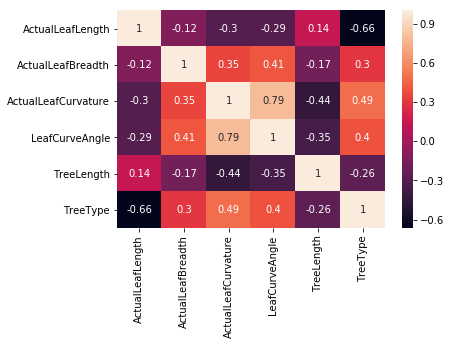

In [26]:
corr = df.corr()
sns.heatmap(corr, annot=True)

plt.show()

In [27]:
#X = df.drop(['TreeType', 'ErrorLeafLength', 'ErrorLeafBreadth', 'ErrorLeafCurvature'], axis = 1)
X = df.drop(['TreeType'], axis = 1)
y = df['TreeType']
X.shape

(17898, 5)

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42, stratify = y)

In [30]:
from sklearn.neighbors import KNeighborsClassifier

In [31]:
neighbors = np.arange(1,9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
for i,k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)

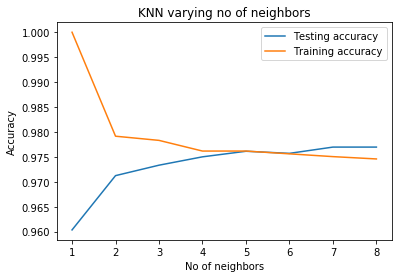

In [32]:
plt.title('KNN varying no of neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training accuracy')
plt.legend()
plt.xlabel('No of neighbors')
plt.ylabel('Accuracy')
plt.show()

As the above graph states, if we use elbow method the training data is breaking at K=2, but we are taking the point where training and testing data is converging at K=5,and compute it as it gives the better result.

In [16]:
knn=KNeighborsClassifier(n_neighbors = 5)

In [17]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [18]:
knn.score(X_test, y_test)

0.9751396648044692

This states that we have 97% of accurate data using this model.

In [21]:
y_pred = knn.predict(X_test)

In [22]:
pd.crosstab(y_test, y_pred, rownames = ['True'], colnames = ['Predicted'], margins = True)

Predicted,0,1,All
True,,,
0,6451,53,6504
1,125,531,656
All,6576,584,7160
